# Harris Corner Detection

In this notebook the rotation of an image will be estimated by matching ponits using Harris Corner Detection.

The Harris Corner Detection uses the sobel vertical and horizontal filter. We then create a new image of the form $I_x^2, I_x \times I_y, I_y^2$. This image is then blurred with a gaussian convolution and then the corner response is then output.

Consider that at a corner at $x$ and $y$, we expect $I_x^2$ and $I_y^2$ to be high. At nearby edges, we will see either a high $I_x^2$ or a high $I_y^2$ but not a high $I_x \times I_y$. The corner point its self will have a low reponse on its own.

Two neighbouring points will have a high $I_x^2$ with low $I_y \times I_x$ and a high $I_y^2$ with low $I_y \times I_x$. Thus by taking the average we sum the high $\sum_w{I_x^2}$ and $\sum_w{I_y^2}$ and a low $\sum_w{I_y \times I_x}$.

If just $\sum_w{I_y^2}$ or just $\sum_w{I_x^2}$ were high then it would be just an edge. We want both $\sum_w{I_y^2}$ and $\sum_w{I_x^2}$ to be high and of a similiar magnitude by using some metric such as...

$\frac{\sum_w{I_y^2} \sum_w{I_x^2} - (\sum_w{I_y \times I_x})^2}{\sum_w{I_y^2} + \sum_w{I_x^2}}$.

In [1]:
# export
import numpy as np
import cv2
from PIL import Image

In [16]:
import pdb
import matplotlib.pyplot as plt
from Export.nb_HistogramEqualisation import compareTwoImages

In [3]:
# export
from Export.nb_Convolutions1D import *
from Export.nb_ConvertToHSV import convertToGrey
from Export.nb_PixelManipulation import getChannels, iterateImage

## Setting up the input images

In [4]:
frog_img_pil = Image.open('Images/dat_boi.jpg')

In [5]:
rotated_frog_pil = frog_img_pil.rotate(120)

In [6]:
frog_img = np.array(frog_img_pil)
rotated_frog = np.array(rotated_frog_pil)

In [7]:
frog_img = cv2.cvtColor(frog_img, cv2.COLOR_RGB2BGR)
rotated_frog = cv2.cvtColor(rotated_frog, cv2.COLOR_RGB2BGR)

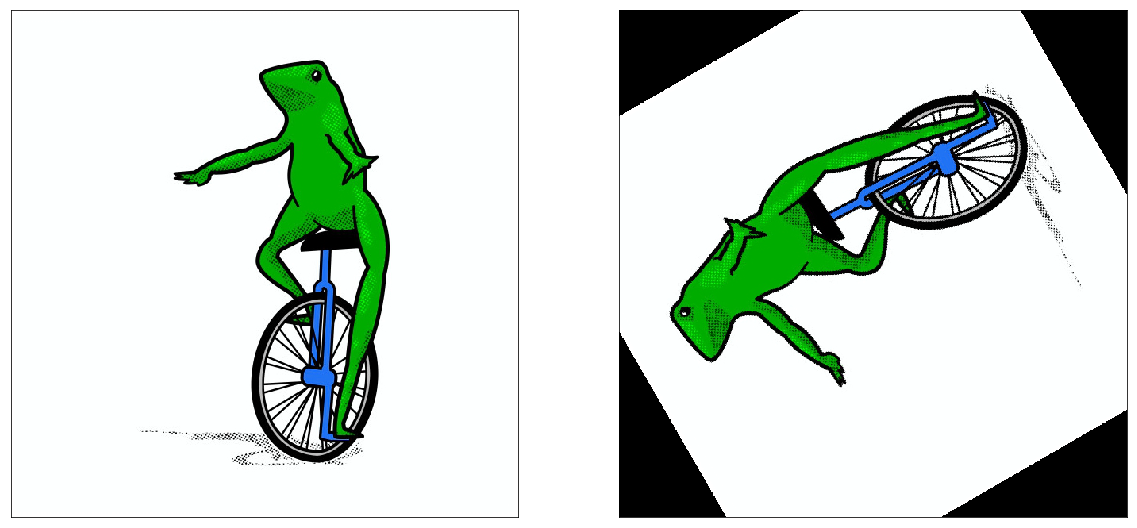

In [8]:
compareTwoImages(frog_img, rotated_frog)

In [9]:
grey_frog_img = frog_img.copy()
grey_rotated_frog = rotated_frog.copy()
grey_frog_img = convertToGrey(grey_frog_img)
grey_rotated_frog = convertToGrey(grey_rotated_frog)

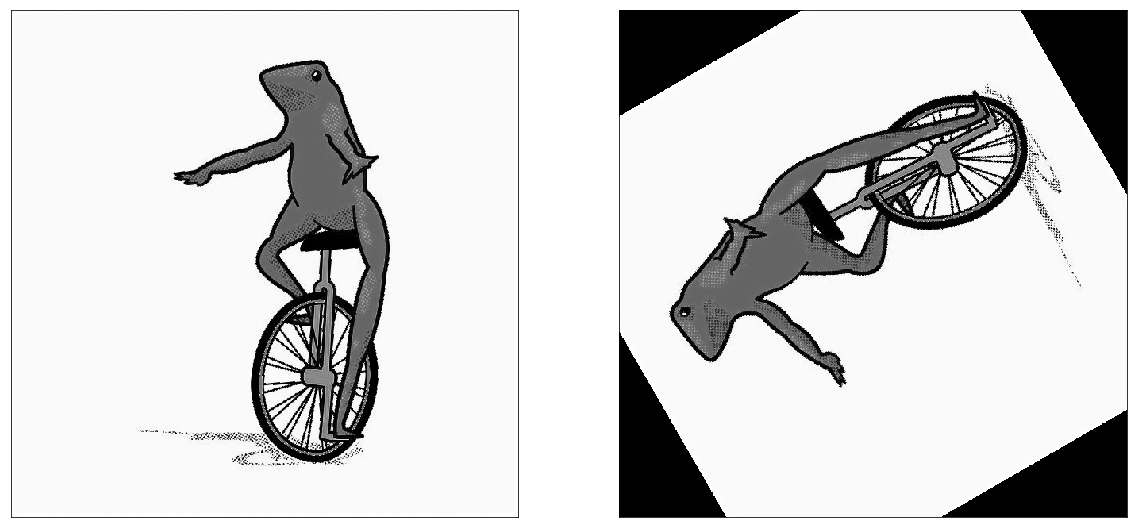

In [10]:
compareTwoImages(grey_frog_img, grey_rotated_frog, cmap = 'gray')

## Harris Corner Detection Pre-processing

Convert a greyscale image into 3 channel image containing each of the following quanitities...  $I_x^2$, $I_y^2$, $I_y \times I_x$.

In [56]:
# export
def computeGradientPolyImage(img: np.array, kernel_size: int):
    _, height, width, channels, _ = getChannels(img)
    if channels != 1 : print('Incorrect input size'); return
    hori_deriv = oneDimConvolution(img.copy(), derivative(kernel_size), True)
    vert_deriv = oneDimConvolution(img.copy(), derivative(kernel_size), False)
    output_img = np.dstack((hori_deriv, vert_deriv, np.zeros((height, width), dtype = np.float32)))
    i, j, k = 0, 0, 0
    for px in np.nditer(output_img, order = 'C', op_flags = ['readwrite']):
        if k == 0:
            current_x = px
        elif k == 1:
            current_y = px
        else:
            px[...] = current_x * current_y
            current_x[...] **= 2
            current_y[...] **= 2
        i, j, k = iterateImage(i, j, k, 3, width)
    return output_img

In [57]:
grad_frog = computeGradientPolyImage(grey_frog_img, 5)

This effect creates a disco frog. Now each channel of the image can be blurred.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


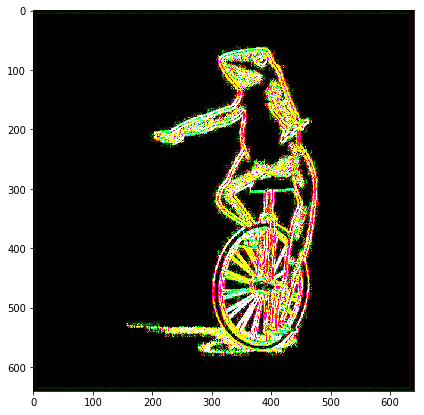

In [58]:
plt.figure(figsize=(7,7))
plt.imshow(grad_frog/255);

## Gaussian Blur Each Channel

## Evaluate Corner Potential of 'Gradient Poly' Image

## Putting It All Together

## Drawing on Two Images Given Matches With Different Strengths

## Find Features Based on Corner Threshold

## Match Features across Two Images

## Export